In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
 "/kaggle/input/100-bird-species/train",
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   "/kaggle/input/100-bird-species/test",
    image_size=(224, 224),
    batch_size=32)
validata = image_dataset_from_directory(
   "/kaggle/input/100-bird-species/valid",
    image_size=(224, 224),
    batch_size=32)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [3]:
import numpy as np
class_names = train_dataset.class_names
np.shape(class_names)

(525,)

In [4]:
class_names[:10]

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS']

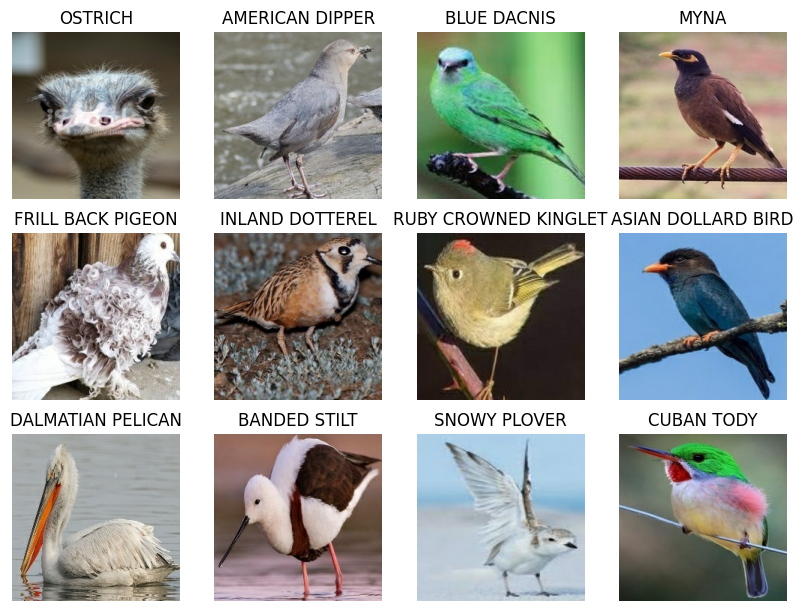

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images,labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)

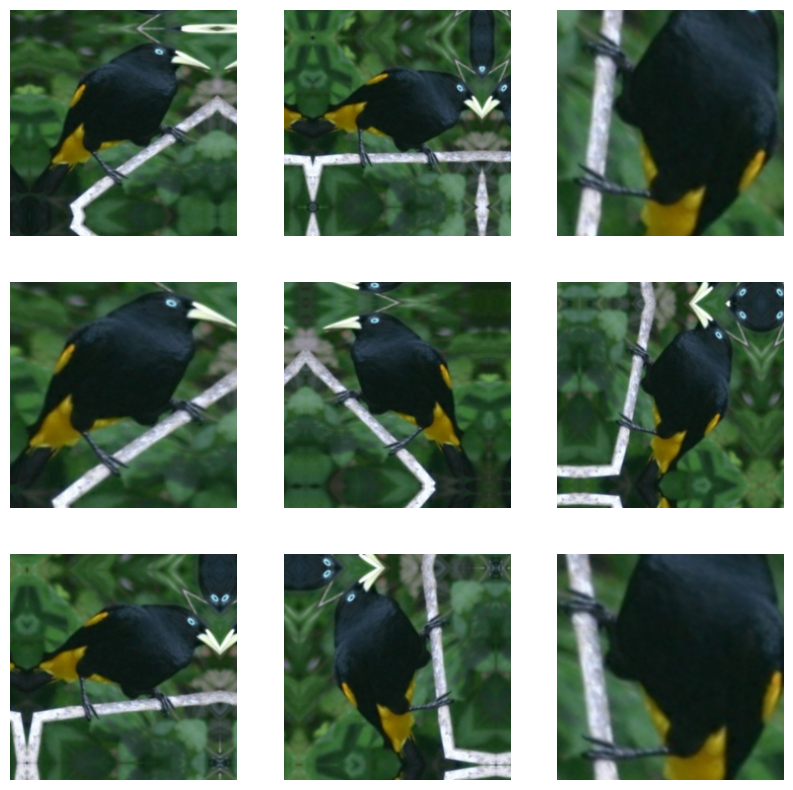

In [7]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [8]:
img_size = (224, 224)

In [9]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 55, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 53, 53, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 525)            │       134,925 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,115,353 (4.25 MB)

 Trainable params: 1,114,387 (4.25 MB)

 Non-trainable params: 966 (3.77 KB)

In [10]:
import tensorflow as tf
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

In [11]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="bird525_nadam.keras",
        save_best_only=True,
        monitor="val_loss")]

In [12]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validata,
    callbacks=callbacks)

Epoch 1/20
   2/2645 ━━━━━━━━━━━━━━━━━━━━ 3:49 87ms/step - accuracy: 0.0000e+00 - loss: 6.3336   

I0000 00:00:1713980706.453106      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2645/2645 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0310 - loss: 5.7246

W0000 00:00:1713980881.903600      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2645/2645 ━━━━━━━━━━━━━━━━━━━━ 203s 69ms/step - accuracy: 0.0310 - loss: 5.7243 - val_accuracy: 0.3349 - val_loss: 3.2108
Epoch 2/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 163s 62ms/step - accuracy: 0.2629 - loss: 3.4600 - val_accuracy: 0.6034 - val_loss: 1.8287
Epoch 3/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 163s 62ms/step - accuracy: 0.4541 - loss: 2.4251 - val_accuracy: 0.7051 - val_loss: 1.3867
Epoch 4/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 163s 62ms/step - accuracy: 0.5566 - loss: 1.9176 - val_accuracy: 0.7676 - val_loss: 1.0123
Epoch 5/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 163s 62ms/step - accuracy: 0.6155 - loss: 1.6318 - val_accuracy: 0.8023 - val_loss: 0.8843
Epoch 6/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 163s 62ms/step - accuracy: 0.6599 - loss: 1.4227 - val_accuracy: 0.8210 - val_loss: 0.7719
Epoch 7/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 163s 62ms/step - accuracy: 0.6898 - loss: 1.2749 - val_accuracy: 0.8415 - val_loss: 0.6697
Epoch 8/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 163s 62ms/step - accuracy: 0.7146 - lo

In [14]:
test_model = keras.models.load_model(
    "bird525_nadam.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9145 - loss: 0.3392
Test accuracy: 0.918


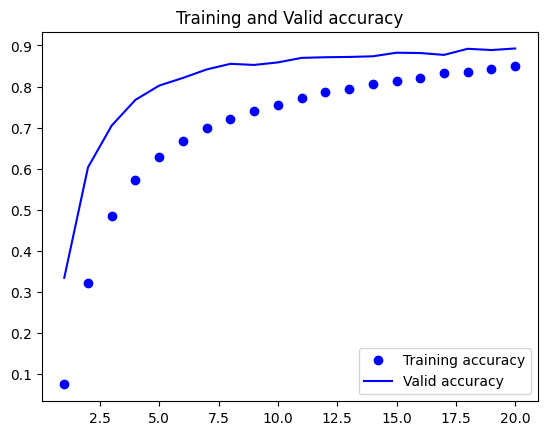

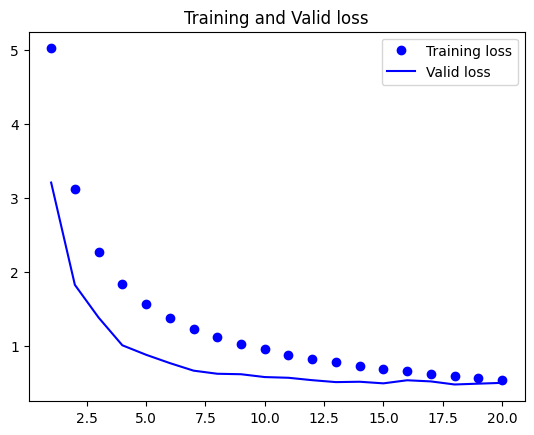

In [15]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

In [ ]:
# pip install --upgrade scipy

In [ ]:
# from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score
# from sklearn.preprocessing import LabelBinarizer

# # Convert class labels to binary matrix
# lb = LabelBinarizer()
# lb.fit(np.arange(525))
# y_true_bin = lb.transform(y_true)

# # Calculate precision-recall curve and area under the curve
# precision = dict()
# recall = dict()
# pr_auc = dict()
# for i in range(525):
#     precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], predictions[:, i])
#     pr_auc[i] = auc(recall[i], precision[i])

# # Compute micro-average ROC curve and ROC area
# fpr, tpr, _ = roc_curve(y_true_bin.ravel(), predictions.ravel())
# roc_auc = auc(fpr, tpr)

# # Calculate F1-score
# f1 = f1_score(y_true, np.argmax(predictions, axis=1), average='weighted')

# # Plot Precision-Recall curve
# plt.figure()
# plt.plot(recall["micro"], precision["micro"], label='micro-average Precision-Recall curve (area = %0.2f)' % pr_auc["micro"])
# for i in range(525):
#     plt.plot(recall[i], precision[i], linestyle='--', label='Precision-recall curve of class {}'.format(i))
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall curve')
# plt.legend(loc="lower left")
# plt.show()

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) curve')
# plt.legend(loc="lower right")
# plt.show()

# # Print F1-score
# print("F1-score: {:.3f}".format(f1))

In [ ]:
# pred = model.predict(test_dataset)
# pred

In [ ]:
# np.argmax(pred[0])

In [ ]:
# from tensorflow.keras.utils import load_img, img_to_array
# def results(filename, class_names):
#     img = load_img(filename,target_size=(224,224))
#     imgconv = img_to_array(img)
#     img_array = np.expand_dims(imgconv,axis=0) 
#     pred = np.argmax(model.predict(img_array))
#     predimg = class_names[pred]
#     predver = np.max(model.predict(img_array))
#     pred
#     plt.imshow(img)
#     plt.title("Eto: {}, veroyatnost : {}".format (predimg, predver))

In [ ]:
# results('/kaggle/input/100-bird-species/test/ANTBIRD/1.jpg', class_names)

In [ ]:
# results('/kaggle/input/100-bird-species/test/CASSOWARY/3.jpg', class_names)

In [ ]:
# results('/kaggle/input/100-bird-species/test/DUNLIN/4.jpg', class_names)